<a href="https://colab.research.google.com/github/KonstantinElfimow/pandas_hypothesis_p_value/blob/main/hypothesis_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

Менеджер Виноградного Дня утверждает что 80% клиентов удовлетворены напитком. Мы опросили 100 человек. 75 довольны. Какой вывод мы можем сделать?

Допустим что удовлетворенность равна 80%. Какова при этом вероятность получить удовлетворенность 75% и ниже при выворке в 100 человек?

H0: удовлетворенность == 80%  
H1: удовлетворенность < 80%

*p*-*value*

In [ ]:
np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(10000)])

0.1287

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
proportions_ztest(75, 100, value=0.8, alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

In [ ]:
import seaborn as sns

<Axes: ylabel='Count'>

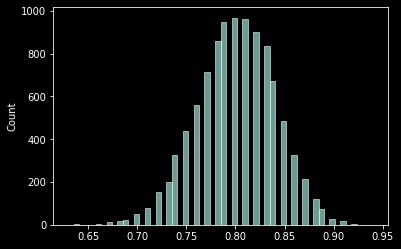

In [ ]:
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])
# p-value можно воспринимать как площадь

<Axes: ylabel='Density'>

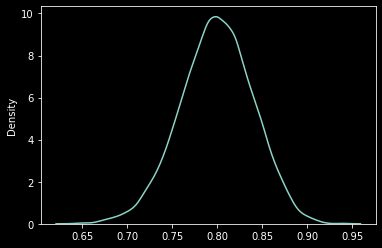

In [ ]:
sns.kdeplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])

Конверсия на текущем лендинге состовляет 10%. Покажем новый лендинг только 30% клиентов.

In [ ]:
df = pd.DataFrame({'group': ['old_landing (A)', 'new_landing (B)'], 'lead': [700, 300], 'sale': [70, 48]})

In [ ]:
df

,group,lead,sale
0,old_landing (A),700,70
1,new_landing (B),300,48


In [ ]:
df['cr'] = df['sale'] / df['lead']

In [ ]:
df

,group,lead,sale,cr
0,old_landing (A),700,70,0.10
1,new_landing (B),300,48,0.16


H0: Допустим, что никакой разницы нет. Какова вероятность получить такие же и большие различия при том, что никакой разницы нет?

In [ ]:
(70 + 48) / (700 + 300)

0.118

In [ ]:
np.random.binomial(1, 0.118, size=700).mean()

0.11857142857142858

In [ ]:
np.random.binomial(1, 0.118, size=300).mean()

0.14666666666666667

In [ ]:
abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean())

0.0023809523809523864

In [ ]:
abs(0.1 - 0.16)

0.06

In [ ]:
abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06
# Мы смотрим на различие, то есть мы генерим 2 выборки из одинакового
# распределения, считаем разницы, берём модуль и проверяем, больше она или
# равна, чем та разница которую мы получили при эксперименте. Это наш генератор.

False

​Вероятность показывает, что есть или нет стат значимое различие. Вывод 
интерпритацию результатов о том, что лучше или хуже - делаешь ты сам.

In [ ]:
[abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for _ in range(10)]

[True, False, False, False, False, False, False, False, False, False]

In [ ]:
np.mean([abs(np.random.binomial(1, 0.118, size=700).mean()
- np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for _ in range(10000)])

0.0075

Отвергнем нашу H0 о том, что разницы нет, так как вероятность нашей гипотезы очень мала. Примем решение, что разница всё-таки есть

In [ ]:
proportions_ztest([70, 48], [700, 300])

(-2.695166510284625, 0.007035346384355496)

Уровень значимости (alpha)

In [ ]:
alpha = 0.05

In [ ]:
from tqdm.notebook import tqdm

Ошибка первого рода

In [129]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.118,size=700)
  b = np.random.binomial(1,0.118,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean() 
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

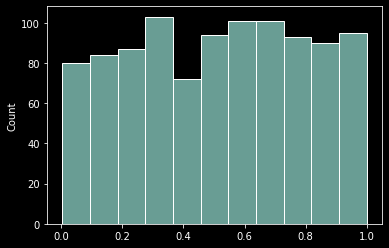

In [130]:
sns.histplot(result)

In [131]:
(np.array(result) < 0.05).mean()

0.035

In [132]:
df = pd.DataFrame(np.random.normal(size=1000))

array([[<Axes: title={'center': '0'}>]], dtype=object)

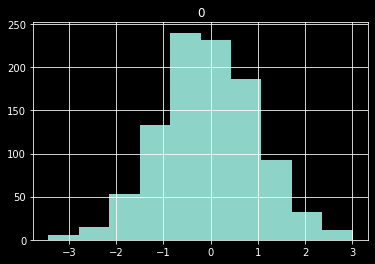

In [133]:
df.hist()

In [134]:
df = df.sort_values(0)

In [135]:
df['cnt'] = range(1,1001)

In [136]:
df['pct'] = df['cnt'] / 1000

<Axes: >

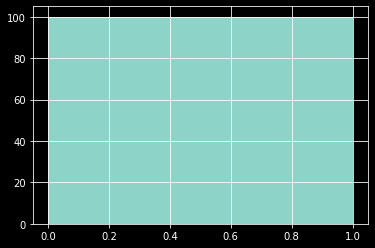

In [137]:
df['pct'].hist()

In [138]:
df

,0,cnt,pct
393,-3.436459,1,0.001
716,-3.217348,2,0.002
600,-3.176213,3,0.003
56,-3.157063,4,0.004
101,-2.832845,5,0.005
...,...,...,...
479,2.753996,996,0.996
106,2.848405,997,0.997
273,2.879533,998,0.998
606,2.906478,999,0.999


In [139]:
df['bin'] = pd.cut(df['pct'],10)

In [140]:
df.groupby('bin')['pct'].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64

In [141]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.12,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean() 
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

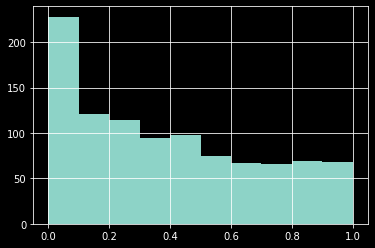

In [142]:
pd.Series(result).hist()

In [143]:
(pd.Series(result) < 0.05).mean()

0.147

Ошибка второго рода

In [144]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.15,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean() 
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [145]:
(pd.Series(result) < 0.05).mean()

0.602

In [146]:
3/7

0.42857142857142855

In [147]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.584, alpha=0.05, ratio=3/7)

681.5816650531352

In [148]:
681.5816650531352 * 3/7

292.1064278799151

In [149]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

680.3526619127882

In [150]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=680)
  b = np.random.binomial(1,0.15,size=680)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=680).mean() 
  - np.random.binomial(1,null_hyp_prob,size=680).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [151]:
(pd.Series(result) < 0.05).mean()

0.809

In [152]:
n = 10000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=680)
  b = np.random.binomial(1,0.15,size=680)
  #diff = abs(a - b)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [153]:
(pd.Series(result) < 0.05).mean()

0.803